In [2]:
import pickle 
import sys
from pprint import pprint

sys.path.append('../')

from methods.SimilarityTests import SimilarityTests
from methods.LMEO import LMEO

st = SimilarityTests()

In [3]:
london_words = st.get_words_dict()['London']

with open(r'pickles/pairwise_london1000.pkl', 'rb') as f:
    london_pairwise = pickle.load(f)

In [4]:
print(st.get_words_dict())

{'Exeter': [['Abode', 'ABode'], 'Vin', 'Mercure', 'Holiday', 'Queens', 'Gate', 'Devon', 'Magdalen', 'South', 'Globe', 'Rougemont', 'Buckerel'], 'Bristol': ['Marriott', 'Gainsborough', 'Hilton', 'Mercure', 'arbour', 'Radisson', 'Avon', 'DoubleTree', 'Berkeley', 'ibis', 'Future', 'ztec', 'gabel'], 'London': ['Savoy', 'Langham', 'Ritz', 'Ned', 'Clarid', 'hangri', 'Dorchest', 'Shard', 'Rose', 'Royal'], 'Manchester': ['Gotham', 'rincipal', 'idland', 'adisson', 'ilton', 'Meli', 'inn', 'INN', 'Inn'], 'Newcastle': ['Crowne', 'Grey', 'Malmaison', 'Dene', 'Vin', 'County', 'Dene', 'Sandman', 'Indigo', 'Hilton', 'Jury'], 'Brighton': ['Drake', 'Vin', 'Jurys', 'Artist', 'Queens', 'Grand', 'TheBrighton'], 'Birmingham': ['ACHotel', 'Hyatt', 'Metro', 'Marriot', 'adisson', 'almaison', 'BirminghamCityCentre', 'Vin', 'Cube', 'dgbaston', 'Grand', 'Staying', 'Indigo', 'Hampton'], 'Leeds': ['Dakota', 'DoubleTree', 'Malmaison', 'Marrio', 'Quebecs', 'Radisson', 'Queen', 'Thorpe', 'Park', 'bisSt', 'Cosmo'], 'Li

In [5]:
print(london_pairwise[:10])
london_ranks = st.rank_to_num(london_pairwise, london_words)
print(london_ranks[:10])

[['The Savoy', 'The Langham'], ['The Savoy', 'The Langham'], ['The Savoy', 'The Langham'], ['The Savoy', 'The Langham'], ['The Savoy', 'The Langham'], ['The Langham', 'The Savoy'], ['The Savoy', 'The Langham'], ['The Savoy', 'The Langham'], ['The Savoy', 'The Langham'], ['The Savoy', 'The Langham']]
([[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [2, 0], [2, 0], [2, 0], [2, 0], [0, 2], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [0, 2], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [0, 2], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [0, 2], [0, 2], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [2, 0], [

In [6]:
print(london_ranks[1])

{0: 'Savoy', 1: 'Langham', 2: 'Ritz', 3: 'Ned', 4: 'Clarid', 5: 'hangri', 6: 'Dorchest', 7: 'Shard', 8: 'Rose', 9: 'Royal', 10: 'OTHER'}


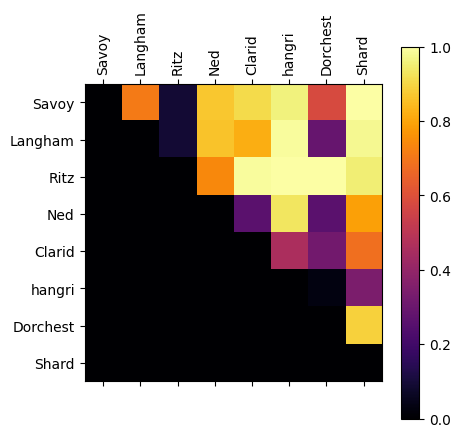

In [23]:
# make a ix i numpy array of zeros
import numpy as np 
import matplotlib.pyplot as plt

london_wins = np.zeros((len(london_words), len(london_words)))

for rank in london_ranks[0]:
    london_wins[rank[0], rank[1]] += 1/100

# Now loop through the wins and losses and calculate the win percentage

# for i in range(len(london_words)):
#     for j in range(len(london_words)):
#         if london_wins[i][j] > london_wins[j][i]:
#             print(i, 'beats', j, london_wins[i,j]/100)
#         elif london_wins[i,j] < london_wins[j,i]:
#             print(i, 'losses', j, london_wins[j,i]/100)
#         else:
#             continue

# Plotting the wins and losses. 
upper_wins = np.triu(london_wins)

plt.matshow(upper_wins[0:8, 0:8], cmap='inferno')
plt.colorbar()
plt.xticks(np.arange(8), london_words[:8], rotation='vertical')
plt.yticks(np.arange(8), london_words[:8])
plt.show()
        


In [8]:
import numpy as np

def calculate_transitivity_violations(ranks, hotel_words):
    london_wins = np.zeros((len(hotel_words), len(hotel_words)))

    for rank in ranks:
        london_wins[rank[0], rank[1]] += 1

    trans_violations = 0
    # Check for transitivity violations
    for i in range(len(hotel_words)):
        for j in range(len(hotel_words)):
            for k in range(len(hotel_words)):
                if london_wins[i][j] > london_wins[j][i] and london_wins[j][k] > london_wins[k][j]:
                    if london_wins[i][k] <= london_wins[k][i]:
                        trans_violations += 1
                        print(f"Transitivity violation: {hotel_words[i]} beats {hotel_words[j]}, {hotel_words[j]} beats {hotel_words[k]}, but {hotel_words[i]} does not beat {hotel_words[k]}")

    return trans_violations / 3


In [9]:
print(london_wins[0][1] > london_wins[1][0])

True
